In [ ]:
%pip install -r requirements.txt --user

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
data_file= pd.read_csv('imports.csv')
data_file.head()

,id,__future__.print_function,matplotlib.pyplot,argparse,os,numpy,models.*,torch,torch.optim,utils.feature_inversion_utils.*,...,sympy.utilities.lambdify.lambdify,traffic.rho_red_light,traffic.flux,helper.l2_norm,helper.plot_3d,numba,helper.laplace_solution,helper.poisson_2d_jacobi,helper.poisson_solution,Base.writemime
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=data_file.values[:,1:]
Clus_dataSet=StandardScaler().fit_transform(X)

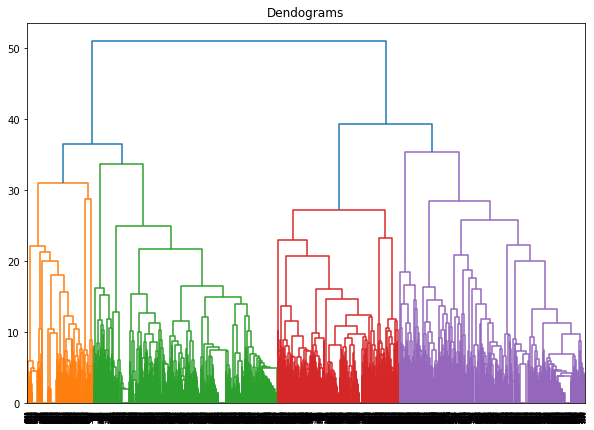

In [5]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
labels = cluster.labels_


In [7]:
data_file.insert(0,'labels', labels)

labels
0     249
1     532
2     123
3     196
4     626
5      72
6     211
7     329
8      92
9     264
10     47
11    137
12    107
13    246
14     81
15     86
16     45
17     41
18     35
19    444
20     48
21    146
22    108
23      6
24     93
25     31
26     69
27      9
28     13
29     23
Name: id, dtype: int64


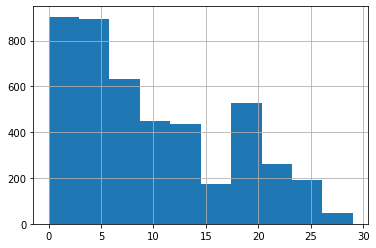

In [8]:
h = data_file['labels'].hist()
fig = h.get_figure()
print(data_file.groupby(['labels'])['id'].count())

In [21]:
df = data_file[data_file.labels ==23]
df = df.loc[:, (df != 0).any(axis=0)]
df

,labels,matplotlib.pyplot,os,numpy,PIL.Image,tqdm.tqdm,random,imgaug.augmenters,cv2,pycocotools.coco.COCO,...,keras.layers.advanced_activations.LeakyReLU,preprocessing.parse_annotation,preprocessing.BatchGenerator,utils.WeightReader,utils.decode_netout,utils.draw_boxes,utils.normalize,utils.draw_bgr_image_boxes,utils.draw_rgb_image_boxes,utils.draw_pil_image_boxes
996,23,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
997,23,1,1,1,0,1,1,0,1,0,...,1,1,1,1,1,0,1,1,0,0
998,23,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
999,23,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1000,23,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1002,23,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
df.sum()

labels                                         138
matplotlib.pyplot                                6
os                                               6
numpy                                            6
PIL.Image                                        5
tqdm.tqdm                                        6
random                                           6
imgaug.augmenters                                5
cv2                                              6
pycocotools.coco.COCO                            1
tensorflow                                       6
IPython.display.HTML                             1
IPython.display.Image                            1
keras.layers.Conv2D                              6
keras.layers.MaxPooling2D                        6
keras.layers.Flatten                             6
keras.layers.Dense                               6
keras.layers.Activation                          6
keras.models.Sequential                          6
keras.callbacks.ModelCheckpoint

In [11]:
data_file.drop('id', axis=1, inplace=True)

In [12]:
data_file.head()


,labels,__future__.print_function,matplotlib.pyplot,argparse,os,numpy,models.*,torch,torch.optim,utils.feature_inversion_utils.*,...,sympy.utilities.lambdify.lambdify,traffic.rho_red_light,traffic.flux,helper.l2_norm,helper.plot_3d,numba,helper.laplace_solution,helper.poisson_2d_jacobi,helper.poisson_solution,Base.writemime
0,6,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = data_file.drop(['labels'], axis=1).values
y = data_file['labels']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [15]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [16]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [18]:
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))


0.9013303769401331
0.8059866962305987
